In [1]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as p3
import numpy as np
import random
import time 


from functools import partial
from ipywidgets import interact, RadioButtons, IntSlider, FloatSlider, Dropdown, BoundedFloatText
from numpy.linalg import norm

random.seed(42) # начальное состояние генератора случайных чисел, чтобы можно было воспроизводить результаты.

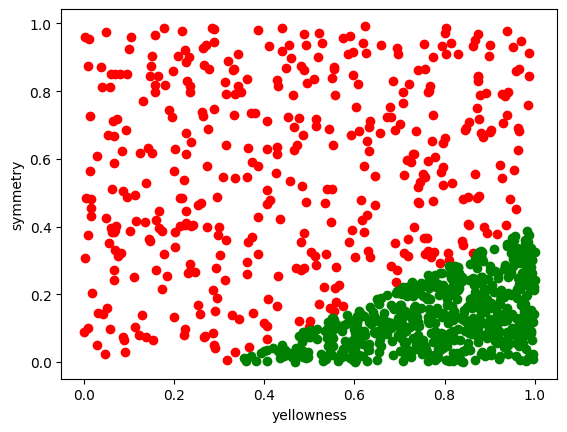

In [2]:
%matplotlib inline
data = np.loadtxt("data.csv", delimiter=",")
pears = data[:, 2] == 1 # фильтрация по третьему столбцу
apples = np.logical_not(pears)
plt.scatter(data[apples][:, 0], data[apples][:, 1], color = "red") # data[data[:, 2] == 1] - маска
plt.scatter(data[pears][:, 0], data[pears][:, 1], color = "green")
plt.xlabel("yellowness")
plt.ylabel("symmetry")
plt.show()

In [3]:
class Perceptron:

    def __init__(self, w, b):
        """
        Инициализируем наш объект - перцептрон.
        w - вектор весов размера (m, 1), где m - количество переменных
        b - число
        """
        
        self.w = w
        self.b = b

    def forward_pass(self, single_input):
        """
        Метод рассчитывает ответ перцептрона при предъявлении одного примера
        single_input - вектор примера размера (m, 1).
        Метод возвращает число (0 или 1) или boolean (True/False)
        """
        
        result = 0
        for i in range(0, len(self.w)):
            result += self.w[i] * single_input[i]
        result += self.b
        
        if result > 0:
            return 1
        else:
            return 0

    def vectorized_forward_pass(self, input_matrix):
        """
        Метод рассчитывает ответ перцептрона при предъявлении набора примеров
        input_matrix - матрица примеров размера (n, m), каждая строка - отдельный пример,
        n - количество примеров, m - количество переменных
        Возвращает вертикальный вектор размера (n, 1) с ответами перцептрона
        (элементы вектора - boolean или целые числа (0 или 1))
        """
            
        data_matrix = np.array(input_matrix)
        data_vector = data_matrix.dot(self.w) + self.b
        return np.array((data_vector)>0).reshape(-1, 1)

        
        ## Этот метод необходимо реализовать
        pass
    
    def train_on_single_example(self, example, y):
        """
        принимает вектор активации входов example формы (m, 1) 
        и правильный ответ для него (число 0 или 1 или boolean),
        обновляет значения весов перцептрона в соответствии с этим примером
        и возвращает размер ошибки, которая случилась на этом примере до изменения весов (0 или 1)
        (на её основании мы потом построим интересный график)
        """ 
        pred = (np.dot(self.w.T, example) + self.b) > 0
        
        error = y - pred
        self.w = self.w + error * example # обновление весов
        self.b = self.b + error
        return error
        

        ## Этот метод необходимо реализовать
        pass

    def train_until_convergence(self, input_matrix, y, max_steps=1e8):
        """
        input_matrix - матрица входов размера (n, m),
        y - вектор правильных ответов размера (n, 1) (y[i] - правильный ответ на пример input_matrix[i]),
        max_steps - максимальное количество шагов.
        Применяем train_on_single_example, пока не перестанем ошибаться или до умопомрачения.
        Константа max_steps - наше понимание того, что считать умопомрачением.
        """
        i = 0
        errors = 1
        while errors and i < max_steps:
            i += 1
            errors = 0
            for example, answer in zip(input_matrix, y):
                example = example.reshape((example.size, 1))
                error = self.train_on_single_example(example, answer)
                errors += int(error)  # int(True) = 1, int(False) = 0, так что можно не делать if

In [4]:
def create_perceptron(m):
    """Создаём перцептрон со случайными весами и m входами"""
    w = np.random.random((m, 1))
    return Perceptron(w, 1)

ВИЗУАЛИЗАЦИЯ ОБУЧЕНИЯ

In [5]:
def plot_line(coefs):
    """
    рисует разделяющую прямую, соответствующую весам, переданным в coefs = (weights, bias), 
    где weights - ndarray формы (2, 1), bias - число
    """
    w, bias = coefs
    a, b = - w[0][0] / w[1][0], - bias / w[1][0] # ЗАЧЕМ ДЕЛИТЬ НА W[1][0]
    xx = np.linspace(*plt.xlim())
    line.set_data(xx, a*xx + b)

In [6]:
def step_by_step_weights(p, input_matrix, y, max_steps=1e6):
    """
    обучает перцептрон последовательно на каждой строчке входных данных, 
    возвращает обновлённые веса при каждом их изменении
    p - объект класса Perceptron
    """
    i = 0
    errors = 1
    while errors and i < max_steps:
        i += 1
        errors = 0
        for example, answer in zip(input_matrix, y):
            example = example.reshape((example.size, 1))
            
            error = p.train_on_single_example(example, answer)
            errors += error  # здесь мы упадём, если вы забыли вернуть размер ошибки из train_on_single_example
            if error:  # будем обновлять положение линии только тогда, когда она изменила своё положение
                yield p.w, p.b # обновляем веса
                
    for _ in range(20): yield p.w, p.b

C:\Users\master\AppData\Local\Temp\ipykernel_13144\1753612786.py:18: UserWarning: frames=functools.partial(<function step_by_step_weights at 0x00000192E012F420>, p=<__main__.Perceptron object at 0x00000192DFF40310>, input_matrix=array([[0.77942731, 0.25730527],
       [0.77700501, 0.0159154 ],
       [0.97709225, 0.30420962],
       ...,
       [0.92721921, 0.13498618],
       [0.01582991, 0.48132194],
       [0.96796389, 0.30857107]]), y=array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.]

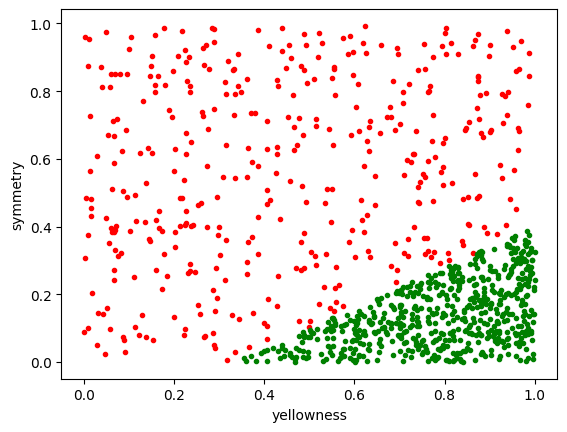

In [7]:

np.random.seed(1)
fig = plt.figure()
plt.scatter(data[apples][:, 0], data[apples][:, 1], color = "red", marker=".", label="Apples")
plt.scatter(data[pears][:, 0], data[pears][:, 1], color = "green", marker=".", label="Pears")
plt.xlabel("yellowness")
plt.ylabel("symmetry")
line, = plt.plot([], [], color="black", linewidth=2)  # создаём линию, которая будет показывать границу разделения

from matplotlib.animation import FuncAnimation

perceptron_for_weights_line = create_perceptron(2)  # создаём перцептрон нужной размерности со случайными весами

from functools import partial
weights_ani = partial(
    step_by_step_weights, p=perceptron_for_weights_line, input_matrix=data[:, :-1], y=data[:, -1][:,np.newaxis]
)  # про partial почитайте на https://docs.python.org/3/library/functools.html#functools.partial

ani = FuncAnimation(fig, func=plot_line, frames=weights_ani, blit=False, interval=10, repeat=True)
# если Jupyter не показывает вам анимацию - раскомментируйте строчку ниже и посмотрите видео
#ani.save("perceptron_seeking_for_solution.mp4", fps=15)
plt.show()

## Не забудьте остановить генерацию новых картинок, прежде чем идти дальше (кнопка "выключить" в правом верхнем углу графика)

In [8]:
def step_by_step_errors(p, input_matrix, y, max_steps=1e6):
    """
    обучает перцептрон последовательно на каждой строчке входных данных, 
    на каждом шаге обучения запоминает количество неправильно классифицированных примеров
    и возвращает список из этих количеств
    """
    def count_errors():
        return np.abs(p.vectorized_forward_pass(input_matrix).astype(np.int_) - y).sum()
    errors_list = [count_errors()]
    i = 0
    errors = 1
    while errors and i < max_steps:
        i += 1
        errors = 0
        for example, answer in zip(input_matrix, y):
            example = example.reshape((example.size, 1))
            
            error = p.train_on_single_example(example, answer) 
            errors += error
            errors_list.append(count_errors())
    return errors_list

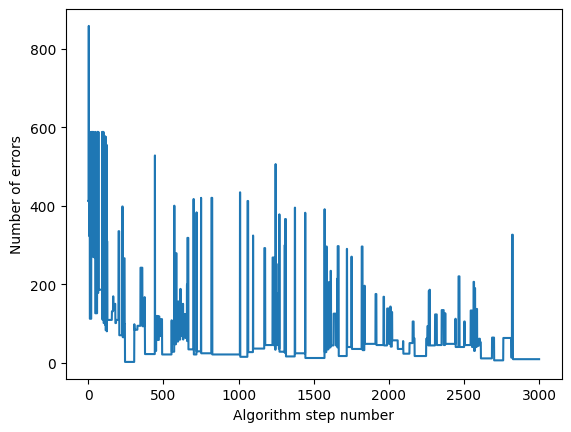

In [9]:
%matplotlib inline
perceptron_for_misclassification = create_perceptron(2)
errors_list = step_by_step_errors(perceptron_for_misclassification, input_matrix=data[:, :-1], y=data[:, -1][:,np.newaxis]) # [:, np.newaxis] добавляет новую ось или измерение к выбранному столбцу
plt.plot(errors_list);
plt.ylabel("Number of errors")
plt.xlabel("Algorithm step number");

In [10]:
def get_vector(p):
    """возвращает вектор из всех весов перцептрона, включая смещение"""
    v = np.array(list(p.w.ravel()) + p.b)
    return v

In [11]:
def step_by_step_distances(p, ideal, input_matrix, y, max_steps=1e6):
    """обучает перцептрон p и записывает каждое изменение расстояния от текущих весов до ideal"""
    distances = [norm(get_vector(p) - ideal)]
    i = 0
    errors = 1
    while errors and i < max_steps:
        i += 1
        errors = 0
        for example, answer in zip(input_matrix, y):
            example = example.reshape((example.size, 1))
            
            error = p.train_on_single_example(example, answer)
            errors += error
            if error:
                distances.append(norm(get_vector(p) - ideal)) # расстояние между веторами это разность между вектрами 
    return distances

C:\Users\master\AppData\Local\Temp\ipykernel_13144\2912758303.py:82: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(error)  # int(True) = 1, int(False) = 0, так что можно не делать if


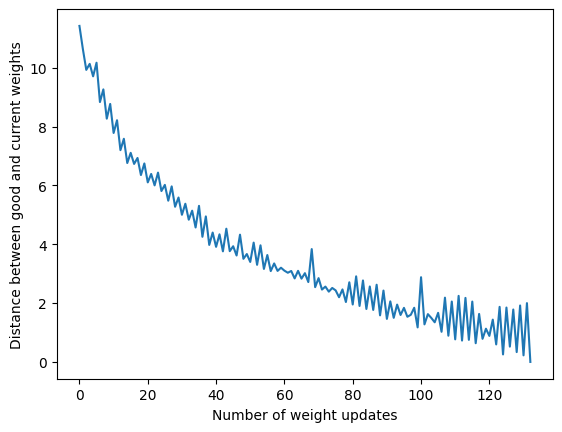

In [12]:
%matplotlib inline

np.random.seed(42)
init_weights = np.random.random_sample(3)
w, b = init_weights[:-1].reshape((2, 1)), init_weights[-1]
ideal_p = Perceptron(w.copy(), b.copy())
ideal_p.train_until_convergence(data[:, :-1], data[:, -1][:,np.newaxis])
ideal_weights = get_vector(ideal_p) # обучили и получили идеальные веса

new_p = Perceptron(w.copy(), b.copy())
distances = step_by_step_distances(new_p, ideal_weights, data[:, :-1], data[:, -1][:,np.newaxis])

plt.xlabel("Number of weight updates")
plt.ylabel("Distance between good and current weights")
plt.plot(distances);

ГРАДИЕНТНЫЙ СПУСК

In [13]:
## Определим разные полезные функции

def sigmoid(x):
    """сигмоидальная функция, работает и с числами, и с векторами (поэлементно)"""
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    """производная сигмоидальной функции, работает и с числами, и с векторами (поэлементно)"""
    return sigmoid(x) * (1 - sigmoid(x))

In [14]:
def J_quadratic(neuron, X, y):
    """
    Оценивает значение квадратичной целевой функции.
    Всё как в лекции, никаких хитростей.

    neuron - нейрон, у которого есть метод vectorized_forward_pass, предсказывающий значения на выборке X
    X - матрица входных активаций (n, m)
    y - вектор правильных ответов (n, 1)
        
    Возвращает значение J (число)
    """
    
    assert y.shape[1] == 1, 'Incorrect y shape'
    
    return 0.5 * np.mean((neuron.vectorized_forward_pass(X) - y) ** 2)

def J_quadratic_derivative(y, y_hat):
    """
    Вычисляет вектор частных производных целевой функции по каждому из предсказаний.
    y_hat - вертикальный вектор предсказаний,
    y - вертикальный вектор правильных ответов,
    
    В данном случае функция смехотворно простая, но если мы захотим поэкспериментировать 
    с целевыми функциями - полезно вынести эти вычисления в отдельный этап.
    
    Возвращает вектор значений производной целевой функции для каждого примера отдельно.
    """
    
    assert y_hat.shape == y.shape and y_hat.shape[1] == 1, 'Incorrect shapes'
    
    return (y_hat - y) / len(y)
    
def compute_grad_analytically(neuron, X, y, J_prime=J_quadratic_derivative):
    """
    Аналитическая производная целевой функции
    neuron - объект класса Neuron
    X - вертикальная матрица входов формы (n, m), на которой считается сумма квадратов отклонений
    y - правильные ответы для примеров из матрицы X
    J_prime - функция, считающая производные целевой функции по ответам
    
    Возвращает вектор размера (m, 1)
    """
    
    # Вычисляем активации
    # z - вектор результатов сумматорной функции нейрона на разных примерах
    
    z = neuron.summatory(X)
    y_hat = neuron.activation(z)

    # Вычисляем нужные нам частные производные
    dy_dyhat = J_prime(y, y_hat)
    dyhat_dz = neuron.activation_function_derivative(z)
    
    # осознайте эту строчку:
    dz_dw = X

    # а главное, эту:
    grad = ((dy_dyhat * dyhat_dz).T).dot(dz_dw)
    
    # можно было написать в два этапа. Осознайте, почему получается одно и то же
    # grad_matrix = dy_dyhat * dyhat_dz * dz_dw
    # grad = np.sum(, axis=0)
    
    # Сделаем из горизонтального вектора вертикальный
    grad = grad.T
    
    return grad

ФУНКЦИИ ДЛЯ ВЫЧИСЛЕНИЯ ГРАДИЕНТА

ВАЖНО!
 Первый множитель задается переменной dy_dyhat, Второй - dyhat_dz и равен он производной от функции активации (сигмоидной функции) в точке z. Последний множитель равен просто X, поскольку значение сумматорной функциb z мы получали по формуле z = X*w. (матричное умножение) и если в этой формуле взять производную по w, то получим Х.
 Осталось просто посчитаь градиент grad. Первые два множителя dy_dyhat и dyhat_dz - вертикальные столбцы, поэтому при умножении умножаются поэлементно, что в результате даст новый вертикальный столбец. Получившийся столбец мы должны умножить на dz_dw = X (размерности n*m), для чего нам нужно протранспонировать получившийся столбец dy_dyhat * dyhat_dz. В результате получим горизонтальный вектор размерности 1*m, который для наглядности протранспонируем.

In [15]:
class Neuron:
    
    def __init__(self, weights, activation_function=sigmoid, activation_function_derivative=sigmoid_prime):
        """
        weights - вертикальный вектор весов нейрона формы (m, 1), weights[0][0] - смещение
        activation_function - активационная функция нейрона, сигмоидальная функция по умолчанию
        activation_function_derivative - производная активационной функции нейрона
        """
        
        assert weights.shape[1] == 1, "Incorrect weight shape" # проверяет условие, что размер второго измерения (колонки) массива weights равен 1.
        
        self.w = weights
        self.activation_function = activation_function
        self.activation_function_derivative = activation_function_derivative
        
    def forward_pass(self, single_input):
        """
        активационная функция логистического нейрона
        single_input - вектор входов формы (m, 1), 
        первый элемент вектора single_input - единица (если вы хотите учитывать смещение)
        """
        
        result = 0
        for i in range(self.w.size):
            result += float(self.w[i] * single_input[i]) # не матричное произвдеение а просто по элементам
        return self.activation_function(result)
    
    def summatory(self, input_matrix):
        """
        Вычисляет результат сумматорной функции для каждого примера из input_matrix. 
        input_matrix - матрица примеров размера (n, m), каждая строка - отдельный пример,
        n - количество примеров, m - количество переменных.
        Возвращает вектор значений сумматорной функции размера (n, 1).
        """
        # Этот метод необходимо реализовать
        res_sum = input_matrix.dot(self.w)
        return res_sum
        
        pass
    
    def activation(self, summatory_activation):
        """
        Вычисляет для каждого примера результат активационной функции,
        получив на вход вектор значений сумматорной функций
        summatory_activation - вектор размера (n, 1), 
        где summatory_activation[i] - значение суммматорной функции для i-го примера.
        Возвращает вектор размера (n, 1), содержащий в i-й строке 
        значение активационной функции для i-го примера.
        """
        res_activation = sigmoid(np.array(summatory_activation))
        return res_activation
        # Этот метод необходимо реализовать
        
        pass
    
    def vectorized_forward_pass(self, input_matrix):
        """
        Векторизованная активационная функция логистического нейрона.
        input_matrix - матрица примеров размера (n, m), каждая строка - отдельный пример,
        n - количество примеров, m - количество переменных.
        Возвращает вертикальный вектор размера (n, 1) с выходными активациями нейрона
        (элементы вектора - float)
        """
        return self.activation(self.summatory(input_matrix))
        
    def SGD(self, X, y, batch_size, learning_rate=0.1, eps=1e-6, max_steps=200):
        """
        Внешний цикл алгоритма градиентного спуска.
        X - матрица входных активаций (n, m)
        y - вектор правильных ответов (n, 1)
        
        learning_rate - константа скорости обучения
        batch_size - размер батча, на основании которого 
        рассчитывается градиент и совершается один шаг алгоритма
        
        eps - критерий остановки номер один: если разница между значением целевой функции 
        до и после обновления весов меньше eps - алгоритм останавливается. 
        Вторым вариантом была бы проверка размера градиента, а не изменение функции,
        что будет работать лучше - неочевидно. В заданиях используйте первый подход.
        
        max_steps - критерий остановки номер два: если количество обновлений весов 
        достигло max_steps, то алгоритм останавливается
        
        Метод возвращает 1, если отработал первый критерий остановки (спуск сошёлся) 
        и 0, если второй (спуск не достиг минимума за отведённое время).
        """
        for i in range(max_steps):
            batch_rows_random = np.random.choice(int(X.shape[0]), batch_size, replace=False)
            delta_fun = self.update_mini_batch(X[batch_rows_random, :], y[batch_rows_random, :], learning_rate, eps)
            if delta_fun == 1:
                return 1

        return 0
        # Этот метод необходимо реализовать
        
        pass
    
    def update_mini_batch(self, X, y, learning_rate, eps):
        """
        X - матрица размера (batch_size, m)
        y - вектор правильных ответов размера (batch_size, 1)
        learning_rate - константа скорости обучения
        eps - критерий остановки номер один: если разница между значением целевой функции 
        до и после обновления весов меньше eps - алгоритм останавливается. 
        
        Рассчитывает градиент (не забывайте использовать подготовленные заранее внешние функции) 
        и обновляет веса нейрона. Если ошибка изменилась меньше, чем на eps - возвращаем 1, 
        иначе возвращаем 0.
        """
    
        target_fun_w = J_quadratic(self, X, y)
        grad = compute_grad_analytically(self, X, y)
        delta_w = learning_rate*grad
        self.w = self.w - delta_w
        new_target_fun_w = J_quadratic(self, X, y)
        if abs(target_fun_w - new_target_fun_w) <= eps:
            return 1
        else:
            return 0
        
        pass

In [16]:
def compute_grad_numerically(neuron, X, y, J=J_quadratic, eps=10e-2):
    """
    Численная производная целевой функции
    neuron - объект класса Neuron
    X - вертикальная матрица входов формы (n, m), на которой считается сумма квадратов отклонений
    y - правильные ответы для тестовой выборки X
    J - целевая функция, градиент которой мы хотим получить
    eps - размер $\delta w$ (малого изменения весов)
    """

    initial_cost = J(neuron, X, y)
    w_0 = neuron.w
    num_grad = np.zeros(w_0.shape)
    
    for i in range(len(w_0)):
        
        old_wi = neuron.w[i].copy()
        # Меняем вес
        neuron.w[i] += eps
        
        # Считаем новое значение целевой функции и вычисляем приближенное значение градиента
        num_grad[i] = (J(neuron, X, y) - initial_cost)/eps
        
        # Возвращаем вес обратно. Лучше так, чем -= eps, чтобы не накапливать ошибки округления
        neuron.w[i] = old_wi
            
    # проверим, что не испортили нейрону веса своими манипуляциями
    assert np.allclose(neuron.w, w_0), "МЫ ИСПОРТИЛИ НЕЙРОНУ ВЕСА"
    return num_grad

In [17]:
# Подготовим данные

X = data[:, :-1]
y = data[:, -1]

X = np.hstack((np.ones((len(y), 1)), X))
y = y.reshape((len(y), 1)) # Обратите внимание на эту очень противную и важную строчку


# Создадим нейрон

w = np.random.random((X.shape[1], 1))
neuron = Neuron(w, activation_function=sigmoid, activation_function_derivative=sigmoid_prime)

# Посчитаем пример
num_grad = compute_grad_numerically(neuron, X, y, J=J_quadratic)
an_grad = compute_grad_analytically(neuron, X, y, J_prime=J_quadratic_derivative)

print("Численный градиент: \n", num_grad)
print("Аналитический градиент: \n", an_grad)

Численный градиент: 
 [[ 0.0213618 ]
 [-0.00339293]
 [ 0.02857961]]
Аналитический градиент: 
 [[ 0.01944716]
 [-0.00466464]
 [ 0.02861785]]


In [18]:
#зависимость разности между анал. и числ. значениями от шага eps
def print_grad_diff(eps):
    num_grad = compute_grad_numerically(neuron, X, y, J=J_quadratic, eps=float(eps))
    an_grad = compute_grad_analytically(neuron, X, y, J_prime=J_quadratic_derivative)
    print(np.linalg.norm(num_grad - an_grad))

print_grad_diff(1)
print_grad_diff(0.01)

0.014688688460016992
0.00023850201695738501


In [19]:
def compute_grad_numerically_2(neuron, X, y, J=J_quadratic, eps=10e-2):
    """
    Численная производная целевой функции.
    neuron - объект класса Neuron с вертикальным вектором весов w,
    X - вертикальная матрица входов формы (n, m), на которой считается сумма квадратов отклонений,
    y - правильные ответы для тестовой выборки X,
    J - целевая функция, градиент которой мы хотим получить,
    eps - размер $\delta w$ (малого изменения весов).
    """
    initial_cost = J(neuron, X, y)
    w_0 = neuron.w
    num_grad = np.zeros(w_0.shape)
    
    for i in range(len(w_0)):
        
        old_wi = neuron.w[i].copy()
        # Меняем вес
        neuron.w[i] += eps        
        # Считаем новое значение целевой функции и вычисляем приближенное значение градиента
        num_grad[i] = (J(neuron, X, y))/(2*eps)
        neuron.w[i] -= 2*eps 
        num_grad[i] -= (J(neuron, X, y))/(2*eps)
        # Возвращаем вес обратно. Лучше так, чем -= eps, чтобы не накапливать ошибки округления
        neuron.w[i] = old_wi
            
    # проверим, что не испортили нейрону веса своими манипуляциями
    assert np.allclose(neuron.w, w_0), "МЫ ИСПОРТИЛИ НЕЙРОНУ ВЕСА"
    return num_grad
    
    # эту функцию необходимо реализовать
    
    pass

Теперь сравним к чему привели наши изменения.(отступали в обе стороны) 

In [20]:
def print_grad_diff_2(eps):
    num_grad = compute_grad_numerically_2(neuron, X, y, J=J_quadratic, eps=float(eps))
    an_grad = compute_grad_analytically(neuron, X, y, J_prime=J_quadratic_derivative)
    print(np.linalg.norm(num_grad-an_grad))

print_grad_diff_2(1)
print_grad_diff_2(0.01)

0.008564366178110861
1.00337218166841e-06


ВИЗУАЛИЗАЦИЯ

In [21]:
def J_by_weights(weights, X, y, bias):
    """
    Посчитать значение целевой функции для нейрона с заданными весами.
    Только для визуализации
    """
    new_w = np.hstack((bias, weights)).reshape((3,1)) # смещение w1 и w2
    return J_quadratic(Neuron(new_w), X, y)




In [22]:
%matplotlib inline

max_b = 40
min_b = -40
max_w1 = 40
min_w1 = -40
max_w2 = 40
min_w2 = -40

g_bias = 0 # график номер 2 будет при первой генерации по умолчанию иметь то значение b, которое выставлено в первом
X_corrupted = X.copy()
y_corrupted = y.copy()

# @interact(fixed_bias=FloatSlider(min=min_b, max=max_b, continuous_update=False), 
#           mixing=FloatSlider(min=0, max=1, continuous_update=False, value=0),
#           shifting=FloatSlider(min=0, max=1, continuous_update=False, value=0)
#             )
def visualize_cost_function(fixed_bias, mixing, shifting):
    """
    Визуализируем поверхность целевой функции на (опционально) подпорченных данных и сами данные.
    Портим данные мы следующим образом: сдвигаем категории навстречу друг другу, на величину, равную shifting 
    Кроме того, меняем классы некоторых случайно выбранных примеров на противоположнее.
    Доля таких примеров задаётся переменной mixing
    
    Нам нужно зафиксировать bias на определённом значении, чтобы мы могли что-нибудь визуализировать.
    Можно посмотреть, как bias влияет на форму целевой функции
    """
    xlim = (min_w1, max_w1)
    ylim = (min_w2, max_w2)
    xx = np.linspace(*xlim, num=101) # `*xlim`: это значит, что аргументы `xlim` передаются в виде развернутой последовательности
    yy = np.linspace(*ylim, num=101)
    xx, yy = np.meshgrid(xx, yy)
    points = np.stack([xx, yy], axis=2)
    
    # не будем портить исходные данные, будем портить их копию
    corrupted = data.copy()
    
    # инвертируем ответы для случайно выбранного поднабора данных
    mixed_subset = np.random.choice(range(len(corrupted)), int(mixing * len(corrupted)), replace=False)
    corrupted[mixed_subset, -1] = np.logical_not(corrupted[mixed_subset, -1])
    
    # сдвинем все груши (внизу справа) на shifting наверх и влево
    pears = corrupted[:, 2] == 1
    apples = np.logical_not(pears)
    corrupted[pears, 0] -= shifting
    corrupted[pears, 1] += shifting
    
    # вытащим наружу испорченные данные
    global X_corrupted, y_corrupted
    X_corrupted = np.hstack((np.ones((len(corrupted),1)), corrupted[:, :-1]))
    y_corrupted = corrupted[:, -1].reshape((len(corrupted), 1))
    
    # посчитаем значения целевой функции на наших новых данных
    calculate_weights = partial(J_by_weights, X=X_corrupted, y=y_corrupted, bias=fixed_bias)
    J_values = np.apply_along_axis(calculate_weights, -1, points)
    
    fig = plt.figure(figsize=(16,5))
    # сначала 3D-график целевой функции
    ax_1 = fig.add_subplot(1, 2, 1, projection='3d')
    surf = ax_1.plot_surface(xx, yy, J_values, alpha=0.3)
    ax_1.set_xlabel("$w_1$")
    ax_1.set_ylabel("$w_2$")
    ax_1.set_zlabel("$J(w_1, w_2)$")
    ax_1.set_title("$J(w_1, w_2)$ for fixed bias = ${}$".format(fixed_bias))
    # потом плоский поточечный график повреждённых данных
    ax_2 = fig.add_subplot(1, 2, 2)
    plt.scatter(corrupted[apples][:, 0], corrupted[apples][:, 1], color = "red", alpha=0.7)
    plt.scatter(corrupted[pears][:, 0], corrupted[pears][:, 1], color = "green", alpha=0.7)
    ax_2.set_xlabel("yellowness")
    ax_2.set_ylabel("symmetry")

    plt.show()


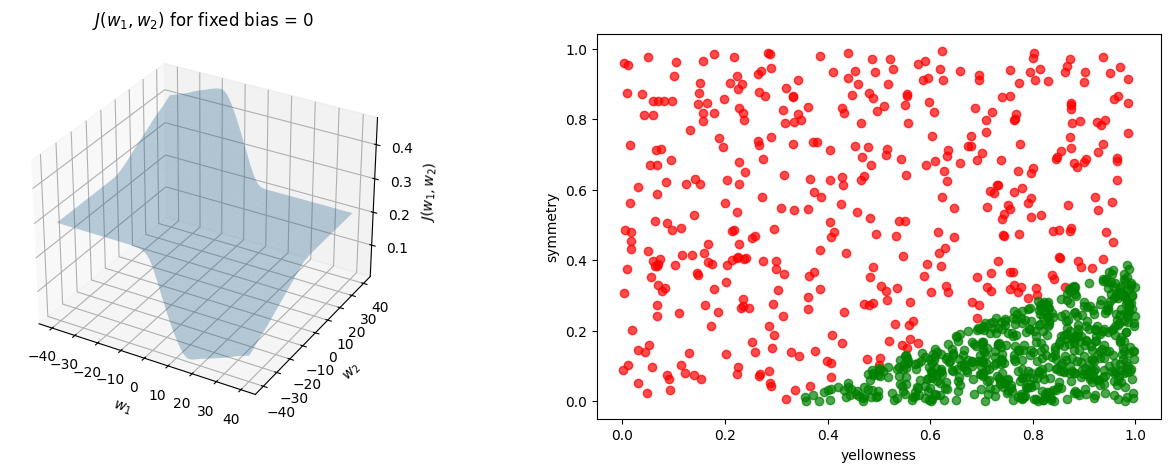

In [23]:
xlim = (min_w1, max_w1)
ylim = (min_w2, max_w2)
xx = np.linspace(*xlim, num=101) # `*xlim`: это значит, что аргументы `xlim` передаются в виде развернутой последовательности
yy = np.linspace(*ylim, num=101)
xx, yy = np.meshgrid(xx, yy)
points = np.stack([xx, yy], axis=2)
    
# не будем портить исходные данные, будем портить их копию
corrupted = data.copy()
    
calculate_weights = partial(J_by_weights, X=X_corrupted, y=y_corrupted, bias=0)
J_values = np.apply_along_axis(calculate_weights, -1, points)
    
fig = plt.figure(figsize=(16,5))
# сначала 3D-график целевой функции
ax_1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax_1.plot_surface(xx, yy, J_values, alpha=0.3)
ax_1.set_xlabel("$w_1$")
ax_1.set_ylabel("$w_2$")
ax_1.set_zlabel("$J(w_1, w_2)$")
ax_1.set_title("$J(w_1, w_2)$ for fixed bias = ${}$".format(0))
# потом плоский поточечный график повреждённых данных
ax_2 = fig.add_subplot(1, 2, 2)
plt.scatter(corrupted[apples][:, 0], corrupted[apples][:, 1], color = "red", alpha=0.7)
plt.scatter(corrupted[pears][:, 0], corrupted[pears][:, 1], color = "green", alpha=0.7)
ax_2.set_xlabel("yellowness")
ax_2.set_ylabel("symmetry")

plt.show()

 Можно было выбрать точку и bias, откуда мы хотим начать градиентный спуск, после чего его программа генерировала "историю обучения" (learning curve) - график значений целевой функции после очередного обновления весов.

Смотря на поверхность целевой функции мы старались предсказать, к каким весам мы придём, если начнём спуск с той или иной точки. Оказалось что всё не так очевидно, как мы думали.
На графике ниже видно, что при "хорошем" раскладе (мы попали в большую яму) значение целевой функции всё время уменьшалось (хоть и по чуть-чуть), пока мы не достигали порога по количеству итераций. При плохом мы могли просто застрять в локальном минимуме или выйти на плато.

\\ Как можно бороться с подобными ловушками мы поговорим на третьей и четвёртой неделях.

*Если в предыдущем задании вы "подпортили" данные - график будет строиться именно для подпорченных =)*

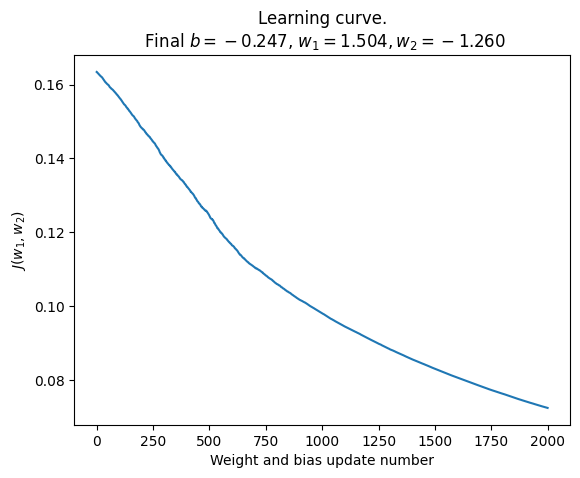

In [24]:
# @interact(b=BoundedFloatText(value=str(g_bias), min=min_b, max=max_b, description="Enter $b$:"),
#           w1=BoundedFloatText(value="0", min=min_w1, max=max_w1, description="Enter $w_1$:"),
#           w2=BoundedFloatText(value="0", min=min_w2, max=max_w2, description="Enter $w_2$:"),
#           learning_rate=Dropdown(options=["0.01", "0.05", "0.1", "0.5", "1", "5", "10"], 
#                                 value="0.01", description="Learning rate: ")
#          )
def learning_curve_for_starting_point(b, w1, w2, learning_rate=0.1):
    w = np.array([b, w1, w2]).reshape(X_corrupted.shape[1], 1)
    learning_rate=float(learning_rate)
    neuron = Neuron(w, activation_function=sigmoid, activation_function_derivative=sigmoid_prime)

    story = [J_quadratic(neuron, X_corrupted, y_corrupted)]
    for _ in range(2000):
        neuron.SGD(X_corrupted, y_corrupted, 4, learning_rate=learning_rate, max_steps=5)
        story.append(J_quadratic(neuron, X_corrupted, y_corrupted))
    plt.plot(story)
    
    plt.title("Learning curve.\n Final $b={0:.3f}$, $w_1={1:.3f}, w_2={2:.3f}$".format(*neuron.w.ravel()))
    plt.ylabel("$J(w_1, w_2)$")
    plt.xlabel("Weight and bias update number")
    plt.show()
    return neuron # добавил возвращение нейрона с обновленными весами

learning_curve_for_starting_point(b=1, w1=1, w2=1, learning_rate=0.01)

Пару тестов...

[[0]
 [0]
 [1]]


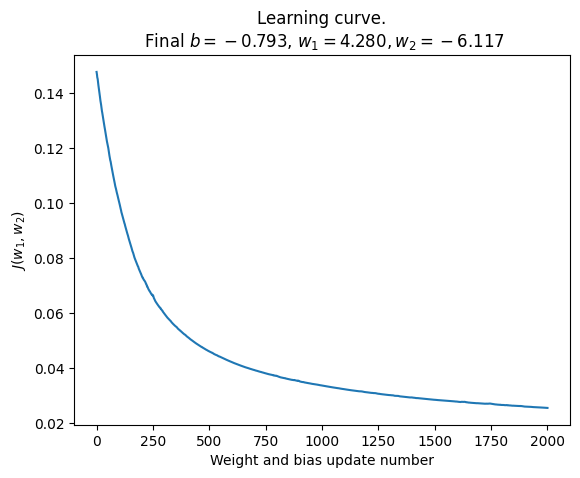

[[-0.79260025]
 [ 4.27984036]
 [-6.11651466]]
Ответ: [[0.38870024]]


In [25]:
learning_rate = 0.01
b, w1, w2 = 0, 0, 1
w = np.array([b, w1, w2]).reshape(X_corrupted.shape[1], 1)
neuron = Neuron(w, activation_function=sigmoid, activation_function_derivative=sigmoid_prime)

print(neuron.w)
# neuron.update_mini_batch(X, y, 0.1, eps = 0.00001 )
#neuron.SGD(X, y, 2, learning_rate=learning_rate, max_steps=4)
learning_neuron = learning_curve_for_starting_point(b, w1, w2, 0.1)
print(learning_neuron.w)
w11 = 1.408992992910701458e-01
w22 = 4.303189802502183081e-02
test_data = np.array([1, w11, w22]).reshape(3, 1)
res = learning_neuron.summatory(test_data.T)
print(f'Ответ: {sigmoid(res)}')

Визуализация ошибок

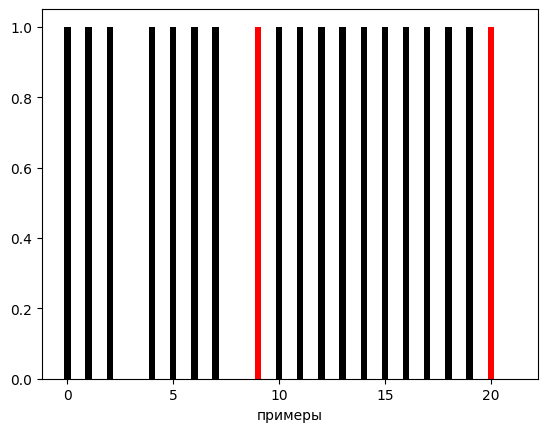

In [26]:
pred_y = []
for example, y_cur in zip(X, y):
    pred = sigmoid(learning_neuron.summatory(example.T))
    if pred > 0.5:
     pred_y.append(int(1))
    else:
        pred_y.append(int(0))
pred_y = np.array(pred_y)
import matplotlib.colors

prices = np.c_[y[:22], pred_y[:22]]
asort = np.argsort(prices, axis=1)
sort = np.sort(prices, axis=1)


cmap = matplotlib.colors.ListedColormap(["black", "red"])
ind = np.arange(prices.shape[0])
width = 0.3

for i in range(prices.shape[1] - 1, -1, -1):
    plt.bar(ind, sort[:, i], width, color=cmap(asort[:, i]))
plt.xlabel('примеры')
plt.show()